<a href="https://colab.research.google.com/github/krDipesh02/Image-Manipulation-Detection/blob/main/casia_96_13_accuracy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [ ]:
!pip install --upgrade keras

In [ ]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image/__init__.py)

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import opendatasets as od

In [ ]:
dataset_url =  "https://www.kaggle.com/sophatvathana/casia-dataset"

In [ ]:
import os

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: krdipesh199
Your Kaggle Key: ··········


100%|██████████| 5.22G/5.22G [00:57<00:00, 98.0MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt2
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import (Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout)
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from keras import regularizers
from keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

**ELA ANALYSIS**

In [ ]:
# function to convert an image in its error level analysis
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'

    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff

    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

    return ela_image

In [ ]:
image_size = (128,128)

In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size))

In [ ]:
X = [] # ELA converted images
Y = [] # 0 for fake, 1 for real

**FOR REAL**

In [ ]:
import random
path = '/content/casia-dataset/CASIA2/Au/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(1)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

random.shuffle(X)
X = X[:2100]
Y = Y[:2100]
print(len(X), len(Y))

Processing 500 images
Processing 1000 images
Processing 1500 images
Processing 2000 images
Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
Processing 4500 images
Processing 5000 images
Processing 5500 images
Processing 6000 images
Processing 6500 images
Processing 7000 images
2100 2100


**FOR FAKE**

In [ ]:
path = '/content/casia-dataset/CASIA2/Tp/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(0)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

print(len(X), len(Y))

Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
4164 4164


In [ ]:
X = np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, 128, 128, 3)

**DATASET SPLIT**

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)
X = X.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

3331 3331
833 833


In [ ]:
!pip install --upgrade keras
!pip install --upgrade tensorflow
from tensorflow.keras.layers import Layer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency res

**INITIAL MODEL**

In [ ]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (128, 128, 3)),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dropout(0.5),

     tf.keras.layers.Dropout(0.3),
     tf.keras.layers.Dense(2, activation='softmax')
     ]
)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs = 50
batch_size = 64

init_lr = 1e-3

# Define a learning rate schedule using tensorflow.keras.optimizers.schedules
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=init_lr,
    decay_steps=epochs,
    decay_rate=0.9,  # You can adjust decay_rate as needed
    staircase=True)

optimizer = Adam(learning_rate=lr_schedule)

In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/CASIA MININET/checkpoints.h5',
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss'
                            )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.15,
                              patience=8,
                              verbose=1
                             )

csv_logger = CSVLogger('/content/drive/MyDrive/CASIA MININET/logs.csv')

early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0.001,
                              patience =5,
                              verbose = 0,
                              mode = 'auto')

callbacks = [checkpoint, reduce_lr, early_stopping, csv_logger]

In [ ]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                 verbose = 1,
                callbacks = callbacks)

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 2.3726 - accuracy: 0.6406
Epoch 1: val_loss improved from inf to 0.55390, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


53/53 [==============================] - 16s 168ms/step - loss: 2.3726 - accuracy: 0.6406 - val_loss: 0.5539 - val_accuracy: 0.6987 - lr: 0.0010
Epoch 2/50
52/53 [============================>.] - ETA: 0s - loss: 0.4268 - accuracy: 0.8182
Epoch 2: val_loss improved from 0.55390 to 0.38771, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 2s 45ms/step - loss: 0.4267 - accuracy: 0.8184 - val_loss: 0.3877 - val_accuracy: 0.8247 - lr: 0.0010
Epoch 3/50
51/53 [===========================>..] - ETA: 0s - loss: 0.3478 - accuracy: 0.8747
Epoch 3: val_loss improved from 0.38771 to 0.35898, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 2s 42ms/step - loss: 0.3478 - accuracy: 0.8751 - val_loss: 0.3590 - val_accuracy: 0.8764 - lr: 0.0010
Epoch 4/50
51/53 [===========================>..] - ETA: 0s - loss: 0.2981 - accuracy: 0.8903
Epoch 4: val_loss improved from 0.35898 to 0.29955, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 2s 43ms/step - loss: 0.2951 - accuracy: 0.8919 - val_loss: 0.2995 - val_accuracy: 0.8944 - lr: 0.0010
Epoch 5/50
51/53 [===========================>..] - ETA: 0s - loss: 0.2607 - accuracy: 0.9041
Epoch 5: val_loss did not improve from 0.29955


53/53 [==============================] - 2s 41ms/step - loss: 0.2620 - accuracy: 0.9030 - val_loss: 0.3169 - val_accuracy: 0.8691 - lr: 0.0010
Epoch 6/50
51/53 [===========================>..] - ETA: 0s - loss: 0.2333 - accuracy: 0.9102
Epoch 6: val_loss did not improve from 0.29955


53/53 [==============================] - 2s 37ms/step - loss: 0.2340 - accuracy: 0.9096 - val_loss: 0.4622 - val_accuracy: 0.7575 - lr: 0.0010
Epoch 7/50
51/53 [===========================>..] - ETA: 0s - loss: 0.2730 - accuracy: 0.8949
Epoch 7: val_loss improved from 0.29955 to 0.25595, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 2s 42ms/step - loss: 0.2742 - accuracy: 0.8940 - val_loss: 0.2560 - val_accuracy: 0.9052 - lr: 0.0010
Epoch 8/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1892 - accuracy: 0.9256
Epoch 8: val_loss improved from 0.25595 to 0.25079, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 2s 44ms/step - loss: 0.1901 - accuracy: 0.9246 - val_loss: 0.2508 - val_accuracy: 0.9124 - lr: 0.0010
Epoch 9/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1740 - accuracy: 0.9335
Epoch 9: val_loss did not improve from 0.25079


53/53 [==============================] - 2s 35ms/step - loss: 0.1719 - accuracy: 0.9340 - val_loss: 0.2579 - val_accuracy: 0.9052 - lr: 0.0010
Epoch 10/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1266 - accuracy: 0.9513
Epoch 10: val_loss did not improve from 0.25079


53/53 [==============================] - 2s 34ms/step - loss: 0.1265 - accuracy: 0.9511 - val_loss: 0.2641 - val_accuracy: 0.9064 - lr: 0.0010
Epoch 11/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1218 - accuracy: 0.9528
Epoch 11: val_loss did not improve from 0.25079


53/53 [==============================] - 2s 36ms/step - loss: 0.1224 - accuracy: 0.9523 - val_loss: 0.2961 - val_accuracy: 0.8812 - lr: 0.0010
Epoch 12/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1050 - accuracy: 0.9574
Epoch 12: val_loss improved from 0.25079 to 0.21983, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 2s 46ms/step - loss: 0.1060 - accuracy: 0.9571 - val_loss: 0.2198 - val_accuracy: 0.9160 - lr: 0.0010
Epoch 13/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1166 - accuracy: 0.9550
Epoch 13: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 35ms/step - loss: 0.1174 - accuracy: 0.9550 - val_loss: 0.4495 - val_accuracy: 0.8403 - lr: 0.0010
Epoch 14/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1135 - accuracy: 0.9540
Epoch 14: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 35ms/step - loss: 0.1121 - accuracy: 0.9547 - val_loss: 0.2268 - val_accuracy: 0.9196 - lr: 0.0010
Epoch 15/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0791 - accuracy: 0.9712
Epoch 15: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 35ms/step - loss: 0.0784 - accuracy: 0.9715 - val_loss: 0.3572 - val_accuracy: 0.8764 - lr: 0.0010
Epoch 16/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0579 - accuracy: 0.9792
Epoch 16: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 36ms/step - loss: 0.0573 - accuracy: 0.9796 - val_loss: 0.2994 - val_accuracy: 0.9064 - lr: 0.0010
Epoch 17/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0465 - accuracy: 0.9838
Epoch 17: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 35ms/step - loss: 0.0462 - accuracy: 0.9838 - val_loss: 0.3178 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 18/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0328 - accuracy: 0.9902
Epoch 18: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 37ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.2791 - val_accuracy: 0.9292 - lr: 0.0010
Epoch 19/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0237 - accuracy: 0.9905
Epoch 19: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 36ms/step - loss: 0.0237 - accuracy: 0.9907 - val_loss: 0.3265 - val_accuracy: 0.9160 - lr: 0.0010
Epoch 20/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0444 - accuracy: 0.9859
Epoch 20: val_loss did not improve from 0.21983

Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.


53/53 [==============================] - 2s 35ms/step - loss: 0.0443 - accuracy: 0.9859 - val_loss: 0.5315 - val_accuracy: 0.9028 - lr: 0.0010
Epoch 21/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0508 - accuracy: 0.9816
Epoch 21: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 35ms/step - loss: 0.0503 - accuracy: 0.9820 - val_loss: 0.3229 - val_accuracy: 0.9220 - lr: 1.5000e-04
Epoch 22/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0148 - accuracy: 0.9960
Epoch 22: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 35ms/step - loss: 0.0147 - accuracy: 0.9961 - val_loss: 0.3458 - val_accuracy: 0.9232 - lr: 1.5000e-04
Epoch 23/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0101 - accuracy: 0.9975
Epoch 23: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 35ms/step - loss: 0.0101 - accuracy: 0.9973 - val_loss: 0.3469 - val_accuracy: 0.9256 - lr: 1.5000e-04
Epoch 24/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0075 - accuracy: 0.9979
Epoch 24: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 35ms/step - loss: 0.0075 - accuracy: 0.9979 - val_loss: 0.3567 - val_accuracy: 0.9184 - lr: 1.5000e-04
Epoch 25/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0064 - accuracy: 0.9988
Epoch 25: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 41ms/step - loss: 0.0064 - accuracy: 0.9988 - val_loss: 0.3677 - val_accuracy: 0.9196 - lr: 1.5000e-04
Epoch 26/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0054 - accuracy: 0.9991
Epoch 26: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 37ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.3810 - val_accuracy: 0.9184 - lr: 1.5000e-04
Epoch 27/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0053 - accuracy: 0.9988
Epoch 27: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 36ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.3928 - val_accuracy: 0.9208 - lr: 1.5000e-04
Epoch 28/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0053 - accuracy: 0.9988
Epoch 28: val_loss did not improve from 0.21983

Epoch 28: ReduceLROnPlateau reducing learning rate to 2.2500001068692655e-05.


53/53 [==============================] - 2s 35ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.3909 - val_accuracy: 0.9232 - lr: 1.5000e-04
Epoch 29/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0031 - accuracy: 0.9997
Epoch 29: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 35ms/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 0.3928 - val_accuracy: 0.9208 - lr: 2.2500e-05
Epoch 30/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 30: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 36ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.3939 - val_accuracy: 0.9196 - lr: 2.2500e-05
Epoch 31/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0036 - accuracy: 0.9991
Epoch 31: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 36ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.3941 - val_accuracy: 0.9208 - lr: 2.2500e-05
Epoch 32/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0037 - accuracy: 0.9997
Epoch 32: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 38ms/step - loss: 0.0037 - accuracy: 0.9997 - val_loss: 0.3956 - val_accuracy: 0.9196 - lr: 2.2500e-05
Epoch 33/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0037 - accuracy: 0.9994
Epoch 33: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 36ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.3965 - val_accuracy: 0.9208 - lr: 2.2500e-05
Epoch 34/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0039 - accuracy: 0.9988
Epoch 34: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 36ms/step - loss: 0.0041 - accuracy: 0.9985 - val_loss: 0.3985 - val_accuracy: 0.9196 - lr: 2.2500e-05
Epoch 35/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0034 - accuracy: 0.9997
Epoch 35: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 36ms/step - loss: 0.0033 - accuracy: 0.9997 - val_loss: 0.3985 - val_accuracy: 0.9208 - lr: 2.2500e-05
Epoch 36/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 36: val_loss did not improve from 0.21983

Epoch 36: ReduceLROnPlateau reducing learning rate to 3.3750000511645338e-06.


53/53 [==============================] - 2s 36ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.4014 - val_accuracy: 0.9208 - lr: 2.2500e-05
Epoch 37/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0035 - accuracy: 0.9997
Epoch 37: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 36ms/step - loss: 0.0035 - accuracy: 0.9997 - val_loss: 0.4015 - val_accuracy: 0.9208 - lr: 3.3750e-06
Epoch 38/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 38: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 37ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.4013 - val_accuracy: 0.9208 - lr: 3.3750e-06
Epoch 39/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0032 - accuracy: 0.9997
Epoch 39: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 38ms/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 0.4013 - val_accuracy: 0.9208 - lr: 3.3750e-06
Epoch 40/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0032 - accuracy: 0.9994
Epoch 40: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 36ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.4016 - val_accuracy: 0.9208 - lr: 3.3750e-06
Epoch 41/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 41: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 36ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4015 - val_accuracy: 0.9208 - lr: 3.3750e-06
Epoch 42/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 42: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 36ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4019 - val_accuracy: 0.9208 - lr: 3.3750e-06
Epoch 43/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0030 - accuracy: 0.9997
Epoch 43: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 36ms/step - loss: 0.0032 - accuracy: 0.9997 - val_loss: 0.4022 - val_accuracy: 0.9208 - lr: 3.3750e-06
Epoch 44/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0034 - accuracy: 0.9997
Epoch 44: val_loss did not improve from 0.21983

Epoch 44: ReduceLROnPlateau reducing learning rate to 5.062500008534698e-07.


53/53 [==============================] - 2s 36ms/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 0.4025 - val_accuracy: 0.9208 - lr: 3.3750e-06
Epoch 45/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0031 - accuracy: 0.9997
Epoch 45: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 38ms/step - loss: 0.0030 - accuracy: 0.9997 - val_loss: 0.4025 - val_accuracy: 0.9208 - lr: 5.0625e-07
Epoch 46/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0035 - accuracy: 0.9997
Epoch 46: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 37ms/step - loss: 0.0035 - accuracy: 0.9997 - val_loss: 0.4025 - val_accuracy: 0.9208 - lr: 5.0625e-07
Epoch 47/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 47: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 36ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4025 - val_accuracy: 0.9208 - lr: 5.0625e-07
Epoch 48/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 48: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 35ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.4025 - val_accuracy: 0.9208 - lr: 5.0625e-07
Epoch 49/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 49: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 36ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.4025 - val_accuracy: 0.9208 - lr: 5.0625e-07
Epoch 50/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0034 - accuracy: 0.9994
Epoch 50: val_loss did not improve from 0.21983


53/53 [==============================] - 2s 36ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.4025 - val_accuracy: 0.9208 - lr: 5.0625e-07


In [ ]:
class_names = ['fake', 'real']

In [ ]:
fake_image = os.listdir('/content/casia-dataset/CASIA2/Tp/')
correct = 0
total = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        fake_image_path = os.path.join('/content/casia-dataset/CASIA2/Tp/', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total += 1
        if y_pred_class == 0:
            correct += 1


1/1 [==============================] - 0s 17ms/step


In [ ]:
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 2064, Correct: 2033, Acc: 98.49806201550388


In [ ]:
real_image = os.listdir('/content/casia-dataset/CASIA2/Au/')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/casia-dataset/CASIA2/Au/', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 18ms/step


In [ ]:
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')

Total: 7354, Correct: 6873, Acc: 93.45934185477292


In [ ]:
correct += correct_r
total += total_r

In [ ]:
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 9418, Correct: 8906, Acc: 94.56360161393077


In [ ]:
import cv2
import numpy as np

# Define the kernel size for median blurring
kernel_size = 5  # You can adjust this parameter based on your preference

# Apply median blurring to each image in X_train
X_train_smoothed = []

for image in X_train:
    # Assuming image is a single image with shape (height, width, channels)
    smoothed_image = cv2.medianBlur(image, kernel_size)
    X_train_smoothed.append(smoothed_image)

# Convert the list to a NumPy array
X_train_smoothed = np.array(X_train_smoothed)


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotations up to 20 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flips
    vertical_flip=True,  # Random vertical flips
    fill_mode='nearest'  # Fill mode for image transformations
)

In [ ]:
datagen.fit(X_train)

# Specify the batch size
batch_size = 64

# Create an iterator from the ImageDataGenerator
augmented_data_generator = datagen.flow(X_train, Y_train, batch_size=batch_size)

In [ ]:
import tensorflow as tf

model_with_batch_normalization_guassian_blur = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='softmax')
])


In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/CASIA MININET BATCH NORMALIZATION GUASSIAN /checkpoints.h5',
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss'
                            )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.15,
                              patience=8,
                              verbose=1
                             )

csv_logger = CSVLogger('/content/drive/MyDrive/CASIA MININET BATCH NORMALIZATION GUASSIAN /logs.csv')

early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0.001,
                              patience = 5,
                              verbose = 0,
                              mode = 'auto')

callbacks = [checkpoint, reduce_lr, early_stopping, csv_logger]

In [ ]:
model_with_batch_normalization_guassian_blur.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
hist = model_with_batch_normalization_guassian_blur.fit(augmented_data_generator,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                 verbose = 1,
                callbacks = callbacks)

**HYPER PARAMETER TUNING**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from kerastuner.tuners import RandomSearch

# Assume X_train, Y_train, X_val, Y_val are your training and validation data

def build_model(hp):
    model = Sequential()

    # Tune the number of filters in the first Conv2D layer
    model.add(layers.Conv2D(hp.Int('filters_1', min_value=32, max_value=256, step=32),
                            (3, 3),
                            padding='same',
                            activation='relu',
                            input_shape=(128, 128, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2, 2))

    # Tune the number of filters in the second Conv2D layer
    model.add(layers.Conv2D(hp.Int('filters_2', min_value=32, max_value=256, step=32),
                            (3, 3),
                            padding='same',
                            activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2, 2))

    # Tune the number of filters in the third Conv2D layer
    model.add(layers.Conv2D(hp.Int('filters_3', min_value=32, max_value=256, step=32),
                            (3, 3),
                            padding='same',
                            activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2, 2))

    # Tune the number of filters in the fourth Conv2D layer
    model.add(layers.Conv2D(hp.Int('filters_4', min_value=32, max_value=256, step=32),
                            (3, 3),
                            padding='same',
                            activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2, 2))

    model.add(layers.Flatten())

    # Tune the number of units in the Dense layer
    model.add(layers.Dense(hp.Int('units_dense', min_value=256, max_value=1024, step=128),
                           activation='relu'))
    model.add(layers.BatchNormalization())

    # Tune the dropout rate in the first Dropout layer
    model.add(layers.Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    # Tune the dropout rate in the second Dropout layer
    model.add(layers.Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(layers.Dense(2, activation='softmax'))

    # Tune the learning rate of the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',  # Adjust based on your problem
                  metrics=['accuracy'])

    return model

# Create a tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Adjust based on your resources
    directory='tuner_dir',
    project_name='my_hyperparameter_tuning'
)

# Start the search for the best hyperparameter configuration
tuner.search(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val))

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(best_hyperparameters.values)

# Train the best model on the full training set
best_model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val))


Trial 5 Complete [00h 01m 15s]
val_accuracy: 0.9219687581062317

Best val_accuracy So Far: 0.9339736104011536
Total elapsed time: 00h 13m 48s
Best Hyperparameters:
{'filters_1': 256, 'filters_2': 160, 'filters_3': 96, 'filters_4': 64, 'units_dense': 512, 'dropout_1': 0.2, 'dropout_2': 0.2, 'learning_rate': 0.0001}
Epoch 1/100
105/105 [==============================] - 18s 131ms/step - loss: 0.0917 - accuracy: 0.9697 - val_loss: 0.1697 - val_accuracy: 0.9304
Epoch 2/100
105/105 [==============================] - 13s 125ms/step - loss: 0.0501 - accuracy: 0.9859 - val_loss: 0.1999 - val_accuracy: 0.9256
Epoch 3/100
105/105 [==============================] - 13s 127ms/step - loss: 0.0956 - accuracy: 0.9652 - val_loss: 0.2869 - val_accuracy: 0.9124
Epoch 4/100
105/105 [==============================] - 13s 126ms/step - loss: 0.0471 - accuracy: 0.9868 - val_loss: 0.1809 - val_accuracy: 0.9292
Epoch 5/100
105/105 [==============================] - 13s 125ms/step - loss: 0.0405 - accuracy: 0.9

In [ ]:
class_names = ['fake', 'real']

In [ ]:
fake_image = os.listdir('/content/casia-dataset/CASIA2/Tp/')
correct_1 = 0
total_1 = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        fake_image_path = os.path.join('/content/casia-dataset/CASIA2/Tp/', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = best_model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_1 += 1
        if y_pred_class == 0:
            correct_1 += 1


1/1 [==============================] - 0s 17ms/step


In [ ]:
print(f'Total: {total_1}, Correct: {correct_1}, Acc: {correct_1 / total_1 * 100.0}')

Total: 2064, Correct: 2037, Acc: 98.69186046511628


In [ ]:
real_image = os.listdir('/content/casia-dataset/CASIA2/Au/')
correct_r_1 = 0
total_r_1 = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/casia-dataset/CASIA2/Au/', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = best_model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r_1 += 1
        if y_pred_class == 1:
            correct_r_1 += 1

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 25ms/step


In [ ]:
print(f'Total: {total_r_1}, Correct: {correct_r_1}, Acc: {correct_r_1 / total_r_1 * 100.0}')

Total: 7354, Correct: 6923, Acc: 94.13924394887137


In [ ]:
correct_1 += correct_r_1
total_1 += total_r_1

In [ ]:
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 9418, Correct: 8906, Acc: 94.56360161393077


**AGAIN HYPERPARAMETER TUNING (41 TRIALS)**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split

# Assuming X and Y are your input data and labels

# Split the data into training and validation sets
# X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

def build_model(hp):
    model = models.Sequential()

    # Tune the number of convolutional layers
    num_conv_layers = hp.Int('num_conv_layers', min_value=2, max_value=10, step=1)

    for i in range(num_conv_layers):
        # Tune the filters and kernel size in each convolutional layer
        filters = hp.Int(f'filters_{i}', min_value=32, max_value=256, step=32)
        kernel_size = hp.Int(f'kernel_size_{i}', min_value=3, max_value=5, step=1)

        model.add(layers.Conv2D(filters,
                                (kernel_size, kernel_size),
                                padding='same',
                                activation='relu',
                                input_shape=(128, 128, 3)))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(2, 2))

    model.add(layers.Flatten())

    # Tune the number of units in the Dense layer
    model.add(layers.Dense(hp.Int('units_dense', min_value=256, max_value=1024, step=128),
                           activation='relu'))
    model.add(layers.BatchNormalization())

    # Tune the dropout rate in the first Dropout layer
    model.add(layers.Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(layers.Dense(2, activation='softmax'))

    # Use ExponentialDecay for learning rate with tuned parameters
    initial_learning_rate = hp.Float('initial_learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    decay_steps = hp.Int('decay_steps', min_value=100, max_value=1000, step=100)
    decay_rate = hp.Float('decay_rate', min_value=0.1, max_value=0.9, step=0.1)

    lr_schedule = ExponentialDecay(initial_learning_rate=initial_learning_rate,
                                   decay_steps=decay_steps,
                                   decay_rate=decay_rate,
                                   staircase=True)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create a tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=41,
    directory='tuner_dir',
    project_name='my_hyperparameter_tuning'
)

# Start the search for the best hyperparameter configuration
tuner.search(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val))

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(best_hyperparameters.values)

# Train the best model on the full training set
# best_model.fit(X_train_smoothed, Y_train, epochs=100, validation_data=(X_val, Y_val))



Trial 41 Complete [00h 02m 25s]
val_accuracy: 0.9219687581062317

Best val_accuracy So Far: 0.9483793377876282
Total elapsed time: 02h 49m 58s
Best Hyperparameters:
{'filters_1': 224, 'filters_2': 32, 'filters_3': 96, 'filters_4': 160, 'units_dense': 512, 'dropout_1': 0.30000000000000004, 'dropout_2': 0.4, 'learning_rate': 0.001, 'kernel_size_1': 5, 'activation_1': 'sigmoid', 'kernel_size_2': 3, 'activation_2': 'tanh', 'kernel_size_3': 4, 'activation_3': 'sigmoid', 'kernel_size_4': 3, 'activation_4': 'tanh', 'dense_activation': 'sigmoid', 'optimizer': 'adam', 'num_conv_layers': 3, 'filters_0': 32, 'kernel_size_0': 3, 'initial_learning_rate': 0.0011080119588590027, 'decay_steps': 800, 'decay_rate': 0.8}


In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 224)       179424    
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 224)       896       
 chNormalization)                                                
                                                        

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

**FITTING ON BEST MODEL**

In [ ]:
best_model.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val))

Epoch 1/10
105/105 [==============================] - 5s 44ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.3378 - val_accuracy: 0.9388
Epoch 2/10
105/105 [==============================] - 5s 47ms/step - loss: 0.0036 - accuracy: 0.9997 - val_loss: 0.3362 - val_accuracy: 0.9388
Epoch 3/10
105/105 [==============================] - 5s 43ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3390 - val_accuracy: 0.9352
Epoch 4/10
105/105 [==============================] - 5s 43ms/step - loss: 9.2772e-04 - accuracy: 0.9997 - val_loss: 0.3440 - val_accuracy: 0.9352
Epoch 5/10
105/105 [==============================] - 5s 44ms/step - loss: 6.2069e-04 - accuracy: 1.0000 - val_loss: 0.3427 - val_accuracy: 0.9400
Epoch 6/10
105/105 [==============================] - 5s 43ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.3355 - val_accuracy: 0.9352
Epoch 7/10
105/105 [==============================] - 5s 43ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.3387 - val_accuracy

In [ ]:
class_names = ['fake', 'real']

** **bold text**TESTING MODEL ON TAMPERED IMAGES**

In [ ]:
fake_image = os.listdir('/content/casia-dataset/CASIA2/Tp/')
correct_1 = 0
total_1 = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        fake_image_path = os.path.join('/content/casia-dataset/CASIA2/Tp/', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = best_model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_1 += 1
        if y_pred_class == 0:
            correct_1 += 1


1/1 [==============================] - 0s 17ms/step


In [ ]:
print(f'Total: {total_1}, Correct: {correct_1}, Acc: {correct_1 / total_1 * 100.0}')

Total: 2064, Correct: 2035, Acc: 98.59496124031007


**TESTING MODEL ON AUTHENTIC IMAGES**

In [ ]:
real_image = os.listdir('/content/casia-dataset/CASIA2/Au/')
correct_r_1 = 0
total_r_1 = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/casia-dataset/CASIA2/Au/', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = best_model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r_1 += 1
        if y_pred_class == 1:
            correct_r_1 += 1

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 21ms/step


In [ ]:
print(f'Total: {total_r_1}, Correct: {correct_r_1}, Acc: {correct_r_1 / total_r_1 * 100.0}')

Total: 7354, Correct: 7019, Acc: 95.44465596954038


In [ ]:
correct_1 += correct_r_1
total_1 += total_r_1

In [ ]:
print(f'Total: {total_1}, Correct: {correct_1}, Acc: {correct_1 / total_1 * 100.0}')

Total: 9418, Correct: 9054, Acc: 96.1350605224039


In [ ]:
best_model.save('my_model_24 jan 2024 accuracy on casia 96.13%_19:47.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os, datetime
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
import pydotplus
import pydot

tf.keras.utils.pydot = pydot

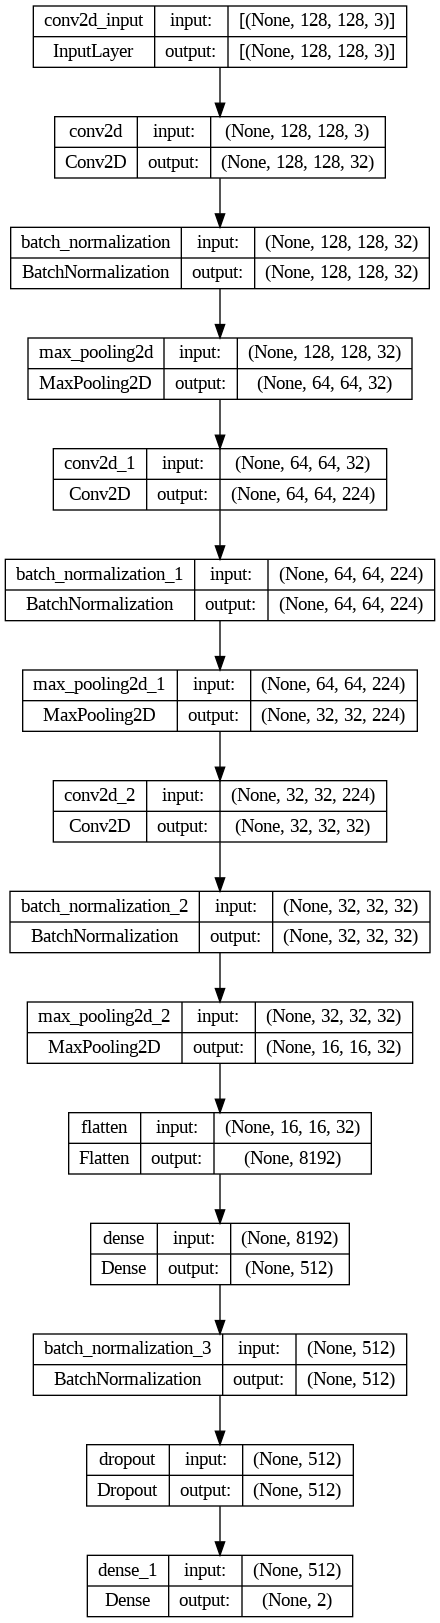

In [ ]:
plot_model(best_model, to_file='model.png', show_shapes=True)

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 224)       179424    
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 224)       896       
 chNormalization)                                                
                                                        

In [ ]:
from tensorflow.keras.models import load_model

# Provide the path to your pre-trained model file
model_path = '/content/drive/MyDrive/my_model_24 jan 2024 accuracy on casia 96.13%_19_47.h5'

# Load the pre-trained model
loaded_model = load_model(model_path)

ModuleNotFoundError: No module named 'keras.src.engine.base_layer_v1'

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 224)       179424    
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 224)       896       
 chNormalization)                                                
                                                        

In [ ]:
import numpy as np

# Get the shape of each layer's weights in the loaded model
layer_shapes = [w.shape for w in loaded_model.get_weights()]

# Generate random weights for each layer
random_weights = [np.random.rand(*shape) for shape in layer_shapes]

# Set the random weights to the loaded model
loaded_model.set_weights(random_weights)


In [ ]:
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 100
batch_size = 64

init_lr = 1e-3

# Define a learning rate schedule using tensorflow.keras.optimizers.schedules
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=init_lr,
    decay_steps=epochs,
    decay_rate=0.9,  # You can adjust decay_rate as needed
    staircase=True)

optimizer = Adam(learning_rate=lr_schedule)

In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/CASIA MININET/checkpoints.h5',
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss'
                            )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.15,
                              patience=8,
                              verbose=1
                             )

csv_logger = CSVLogger('/content/drive/MyDrive/CASIA MININET/logs.csv')

early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0.001,
                              patience =5,
                              verbose = 0,
                              mode = 'auto')

callbacks = [checkpoint, reduce_lr, early_stopping, csv_logger]

In [ ]:
hist = loaded_model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                 verbose = 1,
                callbacks = callbacks)

Epoch 1/100
52/53 [============================>.] - ETA: 0s - loss: 61.1576 - accuracy: 0.5490
Epoch 1: val_loss improved from inf to 867.91010, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


53/53 [==============================] - 13s 198ms/step - loss: 61.1614 - accuracy: 0.5494 - val_loss: 867.9101 - val_accuracy: 0.5078 - lr: 0.0010
Epoch 2/100
52/53 [============================>.] - ETA: 0s - loss: 47.0979 - accuracy: 0.6190
Epoch 2: val_loss improved from 867.91010 to 206.33492, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 86ms/step - loss: 47.1061 - accuracy: 0.6184 - val_loss: 206.3349 - val_accuracy: 0.5354 - lr: 0.0010
Epoch 3/100
52/53 [============================>.] - ETA: 0s - loss: 36.3451 - accuracy: 0.6806
Epoch 3: val_loss improved from 206.33492 to 74.61610, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 87ms/step - loss: 36.3530 - accuracy: 0.6806 - val_loss: 74.6161 - val_accuracy: 0.6110 - lr: 0.0010
Epoch 4/100
52/53 [============================>.] - ETA: 0s - loss: 27.1507 - accuracy: 0.6947
Epoch 4: val_loss improved from 74.61610 to 32.34324, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 88ms/step - loss: 27.1484 - accuracy: 0.6944 - val_loss: 32.3432 - val_accuracy: 0.6723 - lr: 0.0010
Epoch 5/100
52/53 [============================>.] - ETA: 0s - loss: 19.3178 - accuracy: 0.6923
Epoch 5: val_loss improved from 32.34324 to 15.28645, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 86ms/step - loss: 19.3234 - accuracy: 0.6920 - val_loss: 15.2864 - val_accuracy: 0.7155 - lr: 0.0010
Epoch 6/100
52/53 [============================>.] - ETA: 0s - loss: 12.5668 - accuracy: 0.6890
Epoch 6: val_loss improved from 15.28645 to 6.45585, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 87ms/step - loss: 12.5659 - accuracy: 0.6890 - val_loss: 6.4558 - val_accuracy: 0.7323 - lr: 0.0010
Epoch 7/100
52/53 [============================>.] - ETA: 0s - loss: 6.4901 - accuracy: 0.6779
Epoch 7: val_loss improved from 6.45585 to 1.78740, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 88ms/step - loss: 6.4889 - accuracy: 0.6776 - val_loss: 1.7874 - val_accuracy: 0.7395 - lr: 0.0010
Epoch 8/100
52/53 [============================>.] - ETA: 0s - loss: 2.4048 - accuracy: 0.6770
Epoch 8: val_loss improved from 1.78740 to 1.01647, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 87ms/step - loss: 2.4038 - accuracy: 0.6770 - val_loss: 1.0165 - val_accuracy: 0.7335 - lr: 0.0010
Epoch 9/100
52/53 [============================>.] - ETA: 0s - loss: 1.7375 - accuracy: 0.6968
Epoch 9: val_loss improved from 1.01647 to 0.81940, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 89ms/step - loss: 1.7374 - accuracy: 0.6968 - val_loss: 0.8194 - val_accuracy: 0.7179 - lr: 0.0010
Epoch 10/100
52/53 [============================>.] - ETA: 0s - loss: 1.4888 - accuracy: 0.6854
Epoch 10: val_loss improved from 0.81940 to 0.77916, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 88ms/step - loss: 1.4884 - accuracy: 0.6854 - val_loss: 0.7792 - val_accuracy: 0.6975 - lr: 0.0010
Epoch 11/100
52/53 [============================>.] - ETA: 0s - loss: 1.2890 - accuracy: 0.7016
Epoch 11: val_loss improved from 0.77916 to 0.77180, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 86ms/step - loss: 1.2906 - accuracy: 0.7013 - val_loss: 0.7718 - val_accuracy: 0.6591 - lr: 0.0010
Epoch 12/100
52/53 [============================>.] - ETA: 0s - loss: 1.1131 - accuracy: 0.6914
Epoch 12: val_loss improved from 0.77180 to 0.76967, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 86ms/step - loss: 1.1122 - accuracy: 0.6917 - val_loss: 0.7697 - val_accuracy: 0.6459 - lr: 0.0010
Epoch 13/100
52/53 [============================>.] - ETA: 0s - loss: 1.0201 - accuracy: 0.6824
Epoch 13: val_loss did not improve from 0.76967


53/53 [==============================] - 4s 82ms/step - loss: 1.0245 - accuracy: 0.6824 - val_loss: 0.8287 - val_accuracy: 0.5954 - lr: 0.0010
Epoch 14/100
52/53 [============================>.] - ETA: 0s - loss: 0.9370 - accuracy: 0.7001
Epoch 14: val_loss did not improve from 0.76967


53/53 [==============================] - 4s 81ms/step - loss: 0.9373 - accuracy: 0.7001 - val_loss: 0.8243 - val_accuracy: 0.5750 - lr: 0.0010
Epoch 15/100
52/53 [============================>.] - ETA: 0s - loss: 0.8989 - accuracy: 0.7178
Epoch 15: val_loss did not improve from 0.76967


53/53 [==============================] - 4s 81ms/step - loss: 0.8994 - accuracy: 0.7178 - val_loss: 0.8434 - val_accuracy: 0.5630 - lr: 0.0010
Epoch 16/100
52/53 [============================>.] - ETA: 0s - loss: 0.8014 - accuracy: 0.7416
Epoch 16: val_loss did not improve from 0.76967


53/53 [==============================] - 4s 83ms/step - loss: 0.8007 - accuracy: 0.7418 - val_loss: 0.7950 - val_accuracy: 0.5774 - lr: 0.0010
Epoch 17/100
52/53 [============================>.] - ETA: 0s - loss: 0.7276 - accuracy: 0.7641
Epoch 17: val_loss improved from 0.76967 to 0.72054, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 97ms/step - loss: 0.7274 - accuracy: 0.7640 - val_loss: 0.7205 - val_accuracy: 0.6230 - lr: 0.0010
Epoch 18/100
52/53 [============================>.] - ETA: 0s - loss: 0.6978 - accuracy: 0.7927
Epoch 18: val_loss improved from 0.72054 to 0.68073, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 87ms/step - loss: 0.6972 - accuracy: 0.7929 - val_loss: 0.6807 - val_accuracy: 0.6543 - lr: 0.0010
Epoch 19/100
52/53 [============================>.] - ETA: 0s - loss: 0.6539 - accuracy: 0.7912
Epoch 19: val_loss improved from 0.68073 to 0.65273, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 86ms/step - loss: 0.6557 - accuracy: 0.7908 - val_loss: 0.6527 - val_accuracy: 0.6735 - lr: 0.0010
Epoch 20/100
52/53 [============================>.] - ETA: 0s - loss: 0.6356 - accuracy: 0.7993
Epoch 20: val_loss improved from 0.65273 to 0.55147, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 4s 84ms/step - loss: 0.6372 - accuracy: 0.7992 - val_loss: 0.5515 - val_accuracy: 0.7419 - lr: 0.0010
Epoch 21/100
52/53 [============================>.] - ETA: 0s - loss: 0.6366 - accuracy: 0.8101
Epoch 21: val_loss improved from 0.55147 to 0.47615, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 87ms/step - loss: 0.6365 - accuracy: 0.8100 - val_loss: 0.4761 - val_accuracy: 0.7851 - lr: 0.0010
Epoch 22/100
52/53 [============================>.] - ETA: 0s - loss: 0.6187 - accuracy: 0.8095
Epoch 22: val_loss improved from 0.47615 to 0.43318, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 88ms/step - loss: 0.6205 - accuracy: 0.8094 - val_loss: 0.4332 - val_accuracy: 0.8259 - lr: 0.0010
Epoch 23/100
52/53 [============================>.] - ETA: 0s - loss: 0.5876 - accuracy: 0.8236
Epoch 23: val_loss improved from 0.43318 to 0.38979, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 4s 85ms/step - loss: 0.5871 - accuracy: 0.8238 - val_loss: 0.3898 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 24/100
52/53 [============================>.] - ETA: 0s - loss: 0.5778 - accuracy: 0.8269
Epoch 24: val_loss improved from 0.38979 to 0.36587, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 91ms/step - loss: 0.5777 - accuracy: 0.8271 - val_loss: 0.3659 - val_accuracy: 0.8559 - lr: 0.0010
Epoch 25/100
52/53 [============================>.] - ETA: 0s - loss: 0.5803 - accuracy: 0.8293
Epoch 25: val_loss improved from 0.36587 to 0.34922, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 86ms/step - loss: 0.5811 - accuracy: 0.8292 - val_loss: 0.3492 - val_accuracy: 0.8703 - lr: 0.0010
Epoch 26/100
52/53 [============================>.] - ETA: 0s - loss: 0.5740 - accuracy: 0.8344
Epoch 26: val_loss improved from 0.34922 to 0.34367, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 85ms/step - loss: 0.5748 - accuracy: 0.8340 - val_loss: 0.3437 - val_accuracy: 0.8776 - lr: 0.0010
Epoch 27/100
52/53 [============================>.] - ETA: 0s - loss: 0.5569 - accuracy: 0.8453
Epoch 27: val_loss did not improve from 0.34367


53/53 [==============================] - 4s 84ms/step - loss: 0.5575 - accuracy: 0.8451 - val_loss: 0.3489 - val_accuracy: 0.8691 - lr: 0.0010
Epoch 28/100
52/53 [============================>.] - ETA: 0s - loss: 0.5295 - accuracy: 0.8486
Epoch 28: val_loss improved from 0.34367 to 0.33966, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 88ms/step - loss: 0.5342 - accuracy: 0.8481 - val_loss: 0.3397 - val_accuracy: 0.8727 - lr: 0.0010
Epoch 29/100
52/53 [============================>.] - ETA: 0s - loss: 0.5429 - accuracy: 0.8495
Epoch 29: val_loss improved from 0.33966 to 0.33263, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 87ms/step - loss: 0.5432 - accuracy: 0.8493 - val_loss: 0.3326 - val_accuracy: 0.8812 - lr: 0.0010
Epoch 30/100
52/53 [============================>.] - ETA: 0s - loss: 0.5256 - accuracy: 0.8450
Epoch 30: val_loss improved from 0.33263 to 0.33149, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 87ms/step - loss: 0.5256 - accuracy: 0.8448 - val_loss: 0.3315 - val_accuracy: 0.8860 - lr: 0.0010
Epoch 31/100
52/53 [============================>.] - ETA: 0s - loss: 0.5131 - accuracy: 0.8492
Epoch 31: val_loss did not improve from 0.33149


53/53 [==============================] - 4s 81ms/step - loss: 0.5132 - accuracy: 0.8490 - val_loss: 0.3361 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 32/100
52/53 [============================>.] - ETA: 0s - loss: 0.4996 - accuracy: 0.8543
Epoch 32: val_loss did not improve from 0.33149


53/53 [==============================] - 4s 82ms/step - loss: 0.4993 - accuracy: 0.8544 - val_loss: 0.3345 - val_accuracy: 0.8776 - lr: 0.0010
Epoch 33/100
52/53 [============================>.] - ETA: 0s - loss: 0.5039 - accuracy: 0.8588
Epoch 33: val_loss did not improve from 0.33149


53/53 [==============================] - 4s 84ms/step - loss: 0.5045 - accuracy: 0.8586 - val_loss: 0.3338 - val_accuracy: 0.8788 - lr: 0.0010
Epoch 34/100
52/53 [============================>.] - ETA: 0s - loss: 0.5065 - accuracy: 0.8495
Epoch 34: val_loss did not improve from 0.33149


53/53 [==============================] - 4s 81ms/step - loss: 0.5072 - accuracy: 0.8493 - val_loss: 0.3427 - val_accuracy: 0.8920 - lr: 0.0010
Epoch 35/100
52/53 [============================>.] - ETA: 0s - loss: 0.5006 - accuracy: 0.8549
Epoch 35: val_loss did not improve from 0.33149


53/53 [==============================] - 4s 84ms/step - loss: 0.5025 - accuracy: 0.8547 - val_loss: 0.3388 - val_accuracy: 0.8739 - lr: 0.0010
Epoch 36/100
52/53 [============================>.] - ETA: 0s - loss: 0.4979 - accuracy: 0.8591
Epoch 36: val_loss did not improve from 0.33149


53/53 [==============================] - 4s 83ms/step - loss: 0.4974 - accuracy: 0.8592 - val_loss: 0.3330 - val_accuracy: 0.8860 - lr: 0.0010
Epoch 37/100
52/53 [============================>.] - ETA: 0s - loss: 0.4900 - accuracy: 0.8588
Epoch 37: val_loss did not improve from 0.33149


53/53 [==============================] - 4s 82ms/step - loss: 0.4897 - accuracy: 0.8589 - val_loss: 0.3357 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 38/100
52/53 [============================>.] - ETA: 0s - loss: 0.4771 - accuracy: 0.8621
Epoch 38: val_loss improved from 0.33149 to 0.33136, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 99ms/step - loss: 0.4767 - accuracy: 0.8622 - val_loss: 0.3314 - val_accuracy: 0.8884 - lr: 0.0010
Epoch 39/100
52/53 [============================>.] - ETA: 0s - loss: 0.4720 - accuracy: 0.8651
Epoch 39: val_loss did not improve from 0.33136


53/53 [==============================] - 4s 82ms/step - loss: 0.4754 - accuracy: 0.8649 - val_loss: 0.3393 - val_accuracy: 0.8896 - lr: 0.0010
Epoch 40/100
52/53 [============================>.] - ETA: 0s - loss: 0.4607 - accuracy: 0.8651
Epoch 40: val_loss did not improve from 0.33136


53/53 [==============================] - 4s 82ms/step - loss: 0.4612 - accuracy: 0.8649 - val_loss: 0.3321 - val_accuracy: 0.8836 - lr: 0.0010
Epoch 41/100
52/53 [============================>.] - ETA: 0s - loss: 0.4564 - accuracy: 0.8681
Epoch 41: val_loss improved from 0.33136 to 0.32353, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 99ms/step - loss: 0.4564 - accuracy: 0.8682 - val_loss: 0.3235 - val_accuracy: 0.8908 - lr: 0.0010
Epoch 42/100
52/53 [============================>.] - ETA: 0s - loss: 0.4472 - accuracy: 0.8747
Epoch 42: val_loss improved from 0.32353 to 0.31103, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 87ms/step - loss: 0.4471 - accuracy: 0.8748 - val_loss: 0.3110 - val_accuracy: 0.8932 - lr: 0.0010
Epoch 43/100
52/53 [============================>.] - ETA: 0s - loss: 0.4303 - accuracy: 0.8774
Epoch 43: val_loss did not improve from 0.31103


53/53 [==============================] - 4s 81ms/step - loss: 0.4300 - accuracy: 0.8775 - val_loss: 0.3212 - val_accuracy: 0.8896 - lr: 0.0010
Epoch 44/100
52/53 [============================>.] - ETA: 0s - loss: 0.4249 - accuracy: 0.8834
Epoch 44: val_loss improved from 0.31103 to 0.30999, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 88ms/step - loss: 0.4246 - accuracy: 0.8835 - val_loss: 0.3100 - val_accuracy: 0.8980 - lr: 0.0010
Epoch 45/100
52/53 [============================>.] - ETA: 0s - loss: 0.4171 - accuracy: 0.8795
Epoch 45: val_loss did not improve from 0.30999


53/53 [==============================] - 4s 82ms/step - loss: 0.4167 - accuracy: 0.8796 - val_loss: 0.3104 - val_accuracy: 0.9052 - lr: 0.0010
Epoch 46/100
52/53 [============================>.] - ETA: 0s - loss: 0.4100 - accuracy: 0.8837
Epoch 46: val_loss did not improve from 0.30999


53/53 [==============================] - 4s 81ms/step - loss: 0.4120 - accuracy: 0.8835 - val_loss: 0.3148 - val_accuracy: 0.8848 - lr: 0.0010
Epoch 47/100
52/53 [============================>.] - ETA: 0s - loss: 0.4096 - accuracy: 0.8864
Epoch 47: val_loss improved from 0.30999 to 0.29022, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 99ms/step - loss: 0.4108 - accuracy: 0.8862 - val_loss: 0.2902 - val_accuracy: 0.9052 - lr: 0.0010
Epoch 48/100
52/53 [============================>.] - ETA: 0s - loss: 0.4168 - accuracy: 0.8768
Epoch 48: val_loss improved from 0.29022 to 0.28660, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 87ms/step - loss: 0.4172 - accuracy: 0.8766 - val_loss: 0.2866 - val_accuracy: 0.9124 - lr: 0.0010
Epoch 49/100
52/53 [============================>.] - ETA: 0s - loss: 0.3856 - accuracy: 0.8894
Epoch 49: val_loss improved from 0.28660 to 0.28638, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 85ms/step - loss: 0.3856 - accuracy: 0.8895 - val_loss: 0.2864 - val_accuracy: 0.9076 - lr: 0.0010
Epoch 50/100
52/53 [============================>.] - ETA: 0s - loss: 0.4009 - accuracy: 0.8870
Epoch 50: val_loss did not improve from 0.28638


53/53 [==============================] - 4s 84ms/step - loss: 0.4006 - accuracy: 0.8871 - val_loss: 0.2962 - val_accuracy: 0.8956 - lr: 0.0010
Epoch 51/100
52/53 [============================>.] - ETA: 0s - loss: 0.3867 - accuracy: 0.8876
Epoch 51: val_loss improved from 0.28638 to 0.28277, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 95ms/step - loss: 0.3867 - accuracy: 0.8874 - val_loss: 0.2828 - val_accuracy: 0.9028 - lr: 0.0010
Epoch 52/100
52/53 [============================>.] - ETA: 0s - loss: 0.3917 - accuracy: 0.8828
Epoch 52: val_loss did not improve from 0.28277


53/53 [==============================] - 4s 82ms/step - loss: 0.3913 - accuracy: 0.8829 - val_loss: 0.2829 - val_accuracy: 0.9124 - lr: 0.0010
Epoch 53/100
52/53 [============================>.] - ETA: 0s - loss: 0.3892 - accuracy: 0.8831
Epoch 53: val_loss did not improve from 0.28277


53/53 [==============================] - 4s 85ms/step - loss: 0.3908 - accuracy: 0.8829 - val_loss: 0.2830 - val_accuracy: 0.9064 - lr: 0.0010
Epoch 54/100
52/53 [============================>.] - ETA: 0s - loss: 0.3841 - accuracy: 0.8846
Epoch 54: val_loss improved from 0.28277 to 0.27874, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 97ms/step - loss: 0.3864 - accuracy: 0.8844 - val_loss: 0.2787 - val_accuracy: 0.9052 - lr: 0.0010
Epoch 55/100
52/53 [============================>.] - ETA: 0s - loss: 0.3829 - accuracy: 0.8921
Epoch 55: val_loss did not improve from 0.27874


53/53 [==============================] - 4s 82ms/step - loss: 0.3828 - accuracy: 0.8922 - val_loss: 0.2941 - val_accuracy: 0.8932 - lr: 0.0010
Epoch 56/100
52/53 [============================>.] - ETA: 0s - loss: 0.3731 - accuracy: 0.8903
Epoch 56: val_loss did not improve from 0.27874


53/53 [==============================] - 4s 83ms/step - loss: 0.3734 - accuracy: 0.8901 - val_loss: 0.2794 - val_accuracy: 0.9112 - lr: 0.0010
Epoch 57/100
52/53 [============================>.] - ETA: 0s - loss: 0.3816 - accuracy: 0.8873
Epoch 57: val_loss improved from 0.27874 to 0.27321, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 94ms/step - loss: 0.3813 - accuracy: 0.8874 - val_loss: 0.2732 - val_accuracy: 0.9088 - lr: 0.0010
Epoch 58/100
52/53 [============================>.] - ETA: 0s - loss: 0.3831 - accuracy: 0.8882
Epoch 58: val_loss did not improve from 0.27321


53/53 [==============================] - 4s 83ms/step - loss: 0.3827 - accuracy: 0.8883 - val_loss: 0.2767 - val_accuracy: 0.8980 - lr: 0.0010
Epoch 59/100
52/53 [============================>.] - ETA: 0s - loss: 0.3774 - accuracy: 0.8837
Epoch 59: val_loss did not improve from 0.27321


53/53 [==============================] - 4s 82ms/step - loss: 0.3808 - accuracy: 0.8832 - val_loss: 0.2743 - val_accuracy: 0.9052 - lr: 0.0010
Epoch 60/100
52/53 [============================>.] - ETA: 0s - loss: 0.3817 - accuracy: 0.8855
Epoch 60: val_loss improved from 0.27321 to 0.26972, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 98ms/step - loss: 0.3839 - accuracy: 0.8853 - val_loss: 0.2697 - val_accuracy: 0.9088 - lr: 0.0010
Epoch 61/100
52/53 [============================>.] - ETA: 0s - loss: 0.3895 - accuracy: 0.8834
Epoch 61: val_loss did not improve from 0.26972


53/53 [==============================] - 4s 84ms/step - loss: 0.3892 - accuracy: 0.8835 - val_loss: 0.2721 - val_accuracy: 0.8968 - lr: 0.0010
Epoch 62/100
52/53 [============================>.] - ETA: 0s - loss: 0.3629 - accuracy: 0.8873
Epoch 62: val_loss did not improve from 0.26972


53/53 [==============================] - 4s 81ms/step - loss: 0.3626 - accuracy: 0.8874 - val_loss: 0.2770 - val_accuracy: 0.8956 - lr: 0.0010
Epoch 63/100
52/53 [============================>.] - ETA: 0s - loss: 0.3562 - accuracy: 0.8876
Epoch 63: val_loss improved from 0.26972 to 0.26691, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 94ms/step - loss: 0.3559 - accuracy: 0.8877 - val_loss: 0.2669 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 64/100
52/53 [============================>.] - ETA: 0s - loss: 0.3578 - accuracy: 0.8900
Epoch 64: val_loss improved from 0.26691 to 0.26418, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 88ms/step - loss: 0.3609 - accuracy: 0.8895 - val_loss: 0.2642 - val_accuracy: 0.9076 - lr: 0.0010
Epoch 65/100
52/53 [============================>.] - ETA: 0s - loss: 0.3554 - accuracy: 0.8906
Epoch 65: val_loss improved from 0.26418 to 0.26412, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 4s 85ms/step - loss: 0.3569 - accuracy: 0.8904 - val_loss: 0.2641 - val_accuracy: 0.9088 - lr: 0.0010
Epoch 66/100
52/53 [============================>.] - ETA: 0s - loss: 0.3607 - accuracy: 0.8861
Epoch 66: val_loss did not improve from 0.26412


53/53 [==============================] - 4s 81ms/step - loss: 0.3604 - accuracy: 0.8862 - val_loss: 0.2727 - val_accuracy: 0.9124 - lr: 0.0010
Epoch 67/100
52/53 [============================>.] - ETA: 0s - loss: 0.3521 - accuracy: 0.8891
Epoch 67: val_loss improved from 0.26412 to 0.26005, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 90ms/step - loss: 0.3526 - accuracy: 0.8889 - val_loss: 0.2601 - val_accuracy: 0.9136 - lr: 0.0010
Epoch 68/100
52/53 [============================>.] - ETA: 0s - loss: 0.3414 - accuracy: 0.8894
Epoch 68: val_loss did not improve from 0.26005


53/53 [==============================] - 4s 82ms/step - loss: 0.3412 - accuracy: 0.8895 - val_loss: 0.2637 - val_accuracy: 0.9124 - lr: 0.0010
Epoch 69/100
52/53 [============================>.] - ETA: 0s - loss: 0.3514 - accuracy: 0.8912
Epoch 69: val_loss did not improve from 0.26005


53/53 [==============================] - 4s 81ms/step - loss: 0.3512 - accuracy: 0.8913 - val_loss: 0.2658 - val_accuracy: 0.9076 - lr: 0.0010
Epoch 70/100
52/53 [============================>.] - ETA: 0s - loss: 0.3491 - accuracy: 0.8918
Epoch 70: val_loss did not improve from 0.26005


53/53 [==============================] - 4s 84ms/step - loss: 0.3525 - accuracy: 0.8913 - val_loss: 0.2636 - val_accuracy: 0.9136 - lr: 0.0010
Epoch 71/100
52/53 [============================>.] - ETA: 0s - loss: 0.3499 - accuracy: 0.8891
Epoch 71: val_loss improved from 0.26005 to 0.25666, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 95ms/step - loss: 0.3496 - accuracy: 0.8892 - val_loss: 0.2567 - val_accuracy: 0.9088 - lr: 0.0010
Epoch 72/100
52/53 [============================>.] - ETA: 0s - loss: 0.3487 - accuracy: 0.8888
Epoch 72: val_loss did not improve from 0.25666


53/53 [==============================] - 4s 81ms/step - loss: 0.3484 - accuracy: 0.8889 - val_loss: 0.2617 - val_accuracy: 0.9124 - lr: 0.0010
Epoch 73/100
52/53 [============================>.] - ETA: 0s - loss: 0.3415 - accuracy: 0.8948
Epoch 73: val_loss improved from 0.25666 to 0.25635, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 90ms/step - loss: 0.3413 - accuracy: 0.8949 - val_loss: 0.2563 - val_accuracy: 0.9148 - lr: 0.0010
Epoch 74/100
52/53 [============================>.] - ETA: 0s - loss: 0.3392 - accuracy: 0.8921
Epoch 74: val_loss did not improve from 0.25635


53/53 [==============================] - 4s 82ms/step - loss: 0.3389 - accuracy: 0.8922 - val_loss: 0.2636 - val_accuracy: 0.9124 - lr: 0.0010
Epoch 75/100
52/53 [============================>.] - ETA: 0s - loss: 0.3438 - accuracy: 0.8906
Epoch 75: val_loss did not improve from 0.25635


53/53 [==============================] - 4s 81ms/step - loss: 0.3481 - accuracy: 0.8901 - val_loss: 0.2610 - val_accuracy: 0.9088 - lr: 0.0010
Epoch 76/100
52/53 [============================>.] - ETA: 0s - loss: 0.3527 - accuracy: 0.8924
Epoch 76: val_loss did not improve from 0.25635


53/53 [==============================] - 4s 84ms/step - loss: 0.3525 - accuracy: 0.8925 - val_loss: 0.2645 - val_accuracy: 0.9052 - lr: 0.0010
Epoch 77/100
52/53 [============================>.] - ETA: 0s - loss: 0.3326 - accuracy: 0.8903
Epoch 77: val_loss did not improve from 0.25635


53/53 [==============================] - 4s 82ms/step - loss: 0.3324 - accuracy: 0.8904 - val_loss: 0.2743 - val_accuracy: 0.9040 - lr: 0.0010
Epoch 78/100
52/53 [============================>.] - ETA: 0s - loss: 0.3338 - accuracy: 0.8915
Epoch 78: val_loss did not improve from 0.25635


53/53 [==============================] - 4s 81ms/step - loss: 0.3340 - accuracy: 0.8913 - val_loss: 0.2629 - val_accuracy: 0.9112 - lr: 0.0010
Epoch 79/100
52/53 [============================>.] - ETA: 0s - loss: 0.3221 - accuracy: 0.8915
Epoch 79: val_loss improved from 0.25635 to 0.25619, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 100ms/step - loss: 0.3219 - accuracy: 0.8916 - val_loss: 0.2562 - val_accuracy: 0.9124 - lr: 0.0010
Epoch 80/100
52/53 [============================>.] - ETA: 0s - loss: 0.3337 - accuracy: 0.8921
Epoch 80: val_loss did not improve from 0.25619


53/53 [==============================] - 4s 82ms/step - loss: 0.3336 - accuracy: 0.8919 - val_loss: 0.2582 - val_accuracy: 0.9124 - lr: 0.0010
Epoch 81/100
52/53 [============================>.] - ETA: 0s - loss: 0.3154 - accuracy: 0.8990
Epoch 81: val_loss improved from 0.25619 to 0.25321, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 95ms/step - loss: 0.3170 - accuracy: 0.8988 - val_loss: 0.2532 - val_accuracy: 0.9148 - lr: 0.0010
Epoch 82/100
52/53 [============================>.] - ETA: 0s - loss: 0.3363 - accuracy: 0.8921
Epoch 82: val_loss did not improve from 0.25321


53/53 [==============================] - 4s 82ms/step - loss: 0.3360 - accuracy: 0.8922 - val_loss: 0.2799 - val_accuracy: 0.8968 - lr: 0.0010
Epoch 83/100
52/53 [============================>.] - ETA: 0s - loss: 0.3303 - accuracy: 0.8924
Epoch 83: val_loss did not improve from 0.25321


53/53 [==============================] - 4s 82ms/step - loss: 0.3327 - accuracy: 0.8919 - val_loss: 0.2578 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 84/100
52/53 [============================>.] - ETA: 0s - loss: 0.3362 - accuracy: 0.8906
Epoch 84: val_loss did not improve from 0.25321


53/53 [==============================] - 4s 82ms/step - loss: 0.3366 - accuracy: 0.8904 - val_loss: 0.2546 - val_accuracy: 0.9124 - lr: 0.0010
Epoch 85/100
52/53 [============================>.] - ETA: 0s - loss: 0.3175 - accuracy: 0.8945
Epoch 85: val_loss did not improve from 0.25321


53/53 [==============================] - 4s 83ms/step - loss: 0.3205 - accuracy: 0.8943 - val_loss: 0.2597 - val_accuracy: 0.9124 - lr: 0.0010
Epoch 86/100
52/53 [============================>.] - ETA: 0s - loss: 0.3358 - accuracy: 0.8918
Epoch 86: val_loss did not improve from 0.25321


53/53 [==============================] - 4s 84ms/step - loss: 0.3363 - accuracy: 0.8919 - val_loss: 0.2542 - val_accuracy: 0.9112 - lr: 0.0010
Epoch 87/100
52/53 [============================>.] - ETA: 0s - loss: 0.3258 - accuracy: 0.8918
Epoch 87: val_loss did not improve from 0.25321


53/53 [==============================] - 4s 82ms/step - loss: 0.3255 - accuracy: 0.8919 - val_loss: 0.2599 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 88/100
52/53 [============================>.] - ETA: 0s - loss: 0.3141 - accuracy: 0.8975
Epoch 88: val_loss improved from 0.25321 to 0.25204, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 97ms/step - loss: 0.3143 - accuracy: 0.8973 - val_loss: 0.2520 - val_accuracy: 0.9136 - lr: 0.0010
Epoch 89/100
52/53 [============================>.] - ETA: 0s - loss: 0.3139 - accuracy: 0.8924
Epoch 89: val_loss did not improve from 0.25204


53/53 [==============================] - 4s 81ms/step - loss: 0.3142 - accuracy: 0.8922 - val_loss: 0.2539 - val_accuracy: 0.9124 - lr: 0.0010
Epoch 90/100
52/53 [============================>.] - ETA: 0s - loss: 0.3138 - accuracy: 0.8927
Epoch 90: val_loss improved from 0.25204 to 0.25061, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 88ms/step - loss: 0.3135 - accuracy: 0.8928 - val_loss: 0.2506 - val_accuracy: 0.9148 - lr: 0.0010
Epoch 91/100
52/53 [============================>.] - ETA: 0s - loss: 0.3068 - accuracy: 0.8960
Epoch 91: val_loss did not improve from 0.25061


53/53 [==============================] - 4s 82ms/step - loss: 0.3068 - accuracy: 0.8958 - val_loss: 0.2507 - val_accuracy: 0.9112 - lr: 0.0010
Epoch 92/100
52/53 [============================>.] - ETA: 0s - loss: 0.3114 - accuracy: 0.8966
Epoch 92: val_loss did not improve from 0.25061


53/53 [==============================] - 4s 82ms/step - loss: 0.3113 - accuracy: 0.8967 - val_loss: 0.2516 - val_accuracy: 0.9124 - lr: 0.0010
Epoch 93/100
52/53 [============================>.] - ETA: 0s - loss: 0.3254 - accuracy: 0.8927
Epoch 93: val_loss did not improve from 0.25061


53/53 [==============================] - 4s 85ms/step - loss: 0.3253 - accuracy: 0.8928 - val_loss: 0.2533 - val_accuracy: 0.9136 - lr: 0.0010
Epoch 94/100
52/53 [============================>.] - ETA: 0s - loss: 0.3268 - accuracy: 0.8927
Epoch 94: val_loss did not improve from 0.25061


53/53 [==============================] - 4s 81ms/step - loss: 0.3282 - accuracy: 0.8925 - val_loss: 0.2714 - val_accuracy: 0.9040 - lr: 0.0010
Epoch 95/100
52/53 [============================>.] - ETA: 0s - loss: 0.3023 - accuracy: 0.8981
Epoch 95: val_loss improved from 0.25061 to 0.24959, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 95ms/step - loss: 0.3024 - accuracy: 0.8979 - val_loss: 0.2496 - val_accuracy: 0.9160 - lr: 0.0010
Epoch 96/100
52/53 [============================>.] - ETA: 0s - loss: 0.3090 - accuracy: 0.8975
Epoch 96: val_loss did not improve from 0.24959


53/53 [==============================] - 4s 84ms/step - loss: 0.3130 - accuracy: 0.8970 - val_loss: 0.2514 - val_accuracy: 0.9136 - lr: 0.0010
Epoch 97/100
52/53 [============================>.] - ETA: 0s - loss: 0.3202 - accuracy: 0.8966
Epoch 97: val_loss improved from 0.24959 to 0.24558, saving model to /content/drive/MyDrive/CASIA MININET/checkpoints.h5


53/53 [==============================] - 5s 86ms/step - loss: 0.3201 - accuracy: 0.8967 - val_loss: 0.2456 - val_accuracy: 0.9184 - lr: 0.0010
Epoch 98/100
52/53 [============================>.] - ETA: 0s - loss: 0.3139 - accuracy: 0.8996
Epoch 98: val_loss did not improve from 0.24558


53/53 [==============================] - 4s 82ms/step - loss: 0.3154 - accuracy: 0.8994 - val_loss: 0.2465 - val_accuracy: 0.9196 - lr: 0.0010
Epoch 99/100
52/53 [============================>.] - ETA: 0s - loss: 0.2999 - accuracy: 0.8996
Epoch 99: val_loss did not improve from 0.24558


53/53 [==============================] - 5s 85ms/step - loss: 0.3010 - accuracy: 0.8994 - val_loss: 0.2511 - val_accuracy: 0.9172 - lr: 0.0010
Epoch 100/100
52/53 [============================>.] - ETA: 0s - loss: 0.3158 - accuracy: 0.8981
Epoch 100: val_loss did not improve from 0.24558


53/53 [==============================] - 4s 82ms/step - loss: 0.3157 - accuracy: 0.8982 - val_loss: 0.2789 - val_accuracy: 0.8956 - lr: 0.0010


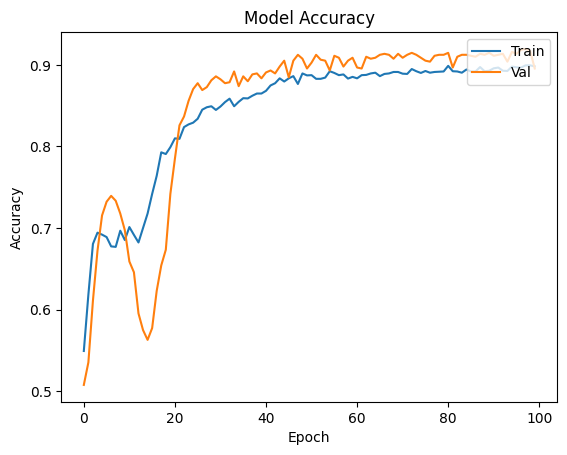

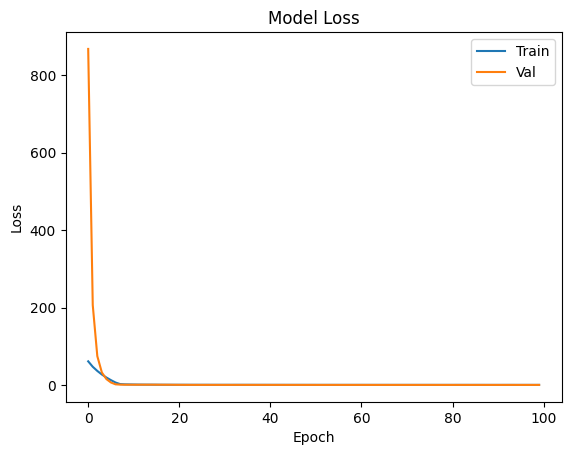

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()